## ICE Summer School : SN Cosmology
 * Notebook developed by Mathew Smith (mat.smith@lancaster.ac.uk)

## Part 1: Deriving Distances

 * SN Cosmology is built on determining accurate distances into the early universe
 * The latest data release from the Zwicky Transient Facility (ZTF-DR2) has recently been made available
 * Today, we will download and exploit this dataset.
 * We will use the SALT2 model to parameterise the light-curves and use these parameters to determine distances

Required libraries: 
 * numpy
 * pandas
 * scipy
 * matplotlib
 * sncosmo
 * astropy
 * scipy
 * ztfcosmo

In [1]:
#!pip install ztfcosmo
import ztfcosmo
import numpy as np
import pandas as pd
from scipy import optimize as opt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from astropy.table import Table
from astropy.cosmology import Planck18
import sncosmo

### Some simple shortcuts for plotting and calculations

In [2]:
fac       = 2.5/np.log(10)
filts     = ['ztfg', 'ztfr', 'ztfi']
plot_cols = {'green':'#00A037', 'orange':'#FF7F2B', 'red':'#E0282F'}
filt_cols = [plot_cols['green'], plot_cols['red'], plot_cols['orange']]
errfloor  = {'ztfg':0.025, 'ztfr':0.035, 'ztfi':0.06}
#
colors    = {'blue':'#194D80', 'yellow':'#F8AD05', 'silver':'#ADADAD', 'green':'#566E3D', 'red':'#A22522'}

#### We can use ztfcosmo to download the latest ZTF-DR2 dataset

In [3]:
sample = ztfcosmo.get_data()
sample.tail(10)

,redshift,redshift_err,source,t0,x0,x1,c,t0_err,x0_err,x1_err,...,dec_host,globalmass,globalmass_err,globalrestframe_gz,globalrestframe_gz_err,d_dlr,localmass,localmass_err,localrestframe_gz,localrestframe_gz_err
ztfname,,,,,,,,,,,,,,,,,,,,,
ZUDS20dnrnc,0.130567,0.000026,z_gal,58895.740823,0.000181,-1.489423,-0.063092,0.183427,0.000007,0.208681,...,50.622564,11.246,0.105304,1.415697,0.029155,0.125176,10.374,0.091,1.359697,0.028302
ZUDS20dofxx,0.270355,0.000100,z_gal,58879.720306,0.000056,-0.855391,-0.057820,0.722392,0.000003,0.608162,...,46.326521,NaN,NaN,NaN,NaN,0.385745,NaN,NaN,NaN,NaN
ZUDS20dpvgu,0.287793,0.000080,z_gal,58888.132311,0.000060,0.604321,-0.134716,0.331027,0.000003,0.450367,...,52.615135,NaN,NaN,NaN,NaN,0.064314,NaN,NaN,NaN,NaN
ZTF20aazhyrs,0.060106,0.000010,z_gal,58984.689347,0.000742,-0.204942,0.076614,0.330191,0.000028,0.245044,...,-5.941555,9.631,0.101119,0.481697,0.018385,0.433523,9.294,0.013,0.573697,0.017692
ZTF18aaajrso,0.075372,0.000010,z_gal,58142.067608,0.000668,5.000000,-0.160439,0.739395,0.000047,1.148856,...,30.932137,9.693,0.103325,0.711697,0.028653,1.214915,7.708,0.069,-0.101303,0.653242
ZTF18acrxnme,0.078210,0.000014,z_gal,58459.559673,0.000720,-0.820927,-0.125119,0.271434,0.000035,0.344767,...,-0.533578,10.620,0.111360,1.084697,0.019849,0.331819,9.949,0.030,1.093697,0.019105
ZTF18aczeraq,0.058635,0.000011,z_gal,58483.107214,0.000913,0.985630,0.088372,0.243003,0.000037,0.287474,...,46.608658,9.818,0.106977,0.867697,0.022023,0.632983,8.656,0.040,0.826697,0.033615
ZTF20aciwcuz,0.061217,0.000013,z_gal,59190.000000,0.004948,5.000000,-0.352244,0.037735,0.000161,0.113433,...,45.006347,10.378,0.101607,0.834697,0.019209,0.585036,8.630,0.034,0.814697,0.055362
ZTF19acdtmwh,0.069910,0.000015,z_gal,58774.273070,0.000468,-0.264331,0.199896,0.231173,0.000026,0.363013,...,24.022772,10.728,0.104995,0.875697,0.019209,0.155724,9.556,0.044,1.153697,0.019209


## For each object, we can obtain the light-curve and spectrum

In [4]:
# Select an example object
ztfname           = 'ZTF18aaqfziz'
ztfname           = 'ZTF19acryaon'
ztfname           = 'ZTF20aayxldg'
# --- #
entry             = sample.loc[ztfname]
entry[['ra','dec','sn_type','redshift','t0','x0','x1','c','mwebv','globalmass']]

ra              248.07205
dec             50.190519
sn_type        snia-cosmo
redshift         0.047193
t0            58993.20429
x0               0.001465
x1               0.821451
c                0.144822
mwebv              0.0204
globalmass         10.837
Name: ZTF20aayxldg, dtype: object

### Download and visualise the spectra

In [5]:
all_spec              = ztfcosmo.get_spec_datafile()
ztfname_spec          = all_spec[all_spec.ztfname==ztfname]
spec                  = ztfcosmo.get_target_spectra(ztfname)
ztfname_spec

,fullpath,basename,ztfname,date,telescope,version,phase_obs,phase
1859,/data/ztfsniadr2/spectra/ZTF20aayxldg_20200511...,ZTF20aayxldg_20200511_SEDm_0.ascii,ZTF20aayxldg,20200511,SEDm,0,-13.20429,-12.609227
2850,/data/ztfsniadr2/spectra/ZTF20aayxldg_20200512...,ZTF20aayxldg_20200512_SEDm_0.ascii,ZTF20aayxldg,20200512,SEDm,0,-12.20429,-11.654293
2896,/data/ztfsniadr2/spectra/ZTF20aayxldg_20200515...,ZTF20aayxldg_20200515_SEDm_0.ascii,ZTF20aayxldg,20200515,SEDm,0,-9.20429,-8.789490


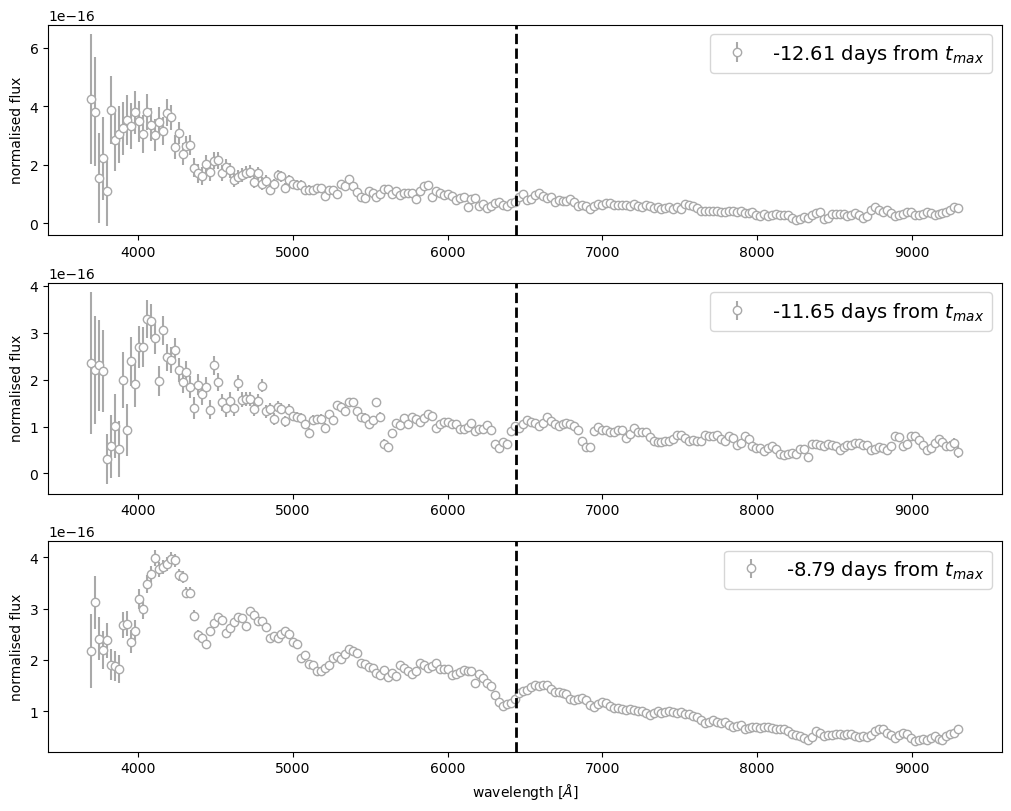

In [6]:
fig, axs              = plt.subplots(ncols=1, nrows=len(ztfname_spec), figsize=(10,8), layout="constrained")
# ----------------------------------------------------------- # 
for n in np.arange(0,len(ztfname_spec)):
    if len(ztfname_spec)>1:
        this_spec     = spec[n][1]
        ax            = axs[n]
    else:
        this_spec     = spec[1]
        ax            = axs
    if 'variance' in this_spec.columns:
        _                 = ax.errorbar(this_spec.lbda, this_spec.flux, yerr=np.sqrt(this_spec.variance), fmt='o', \
                                            c='darkgrey', mfc='w', zorder=1, label=f'{ztfname_spec.iloc[n].phase:0.2f} days from '+r'$t_{max}$')
    else:
        _                 = ax.plot(this_spec.lbda, this_spec.flux, c='darkgrey', zorder=1, \
                                           label=f'{ztfname_spec.iloc[n].phase:0.2f} days from '+r'$t_{max}$')
    _                 = ax.axvline(6150*(1+entry.redshift), lw=2, color='black', ls='--')

    _                 = ax.set_ylabel('normalised flux')
    legend_data       = ax.legend(loc='upper right', fancybox=True, framealpha=0.8, prop={'size': 14})

_                     = ax.set_xlabel('wavelength [$\AA$]')

## Download and visualise the light-curve in flux and magnitude-space

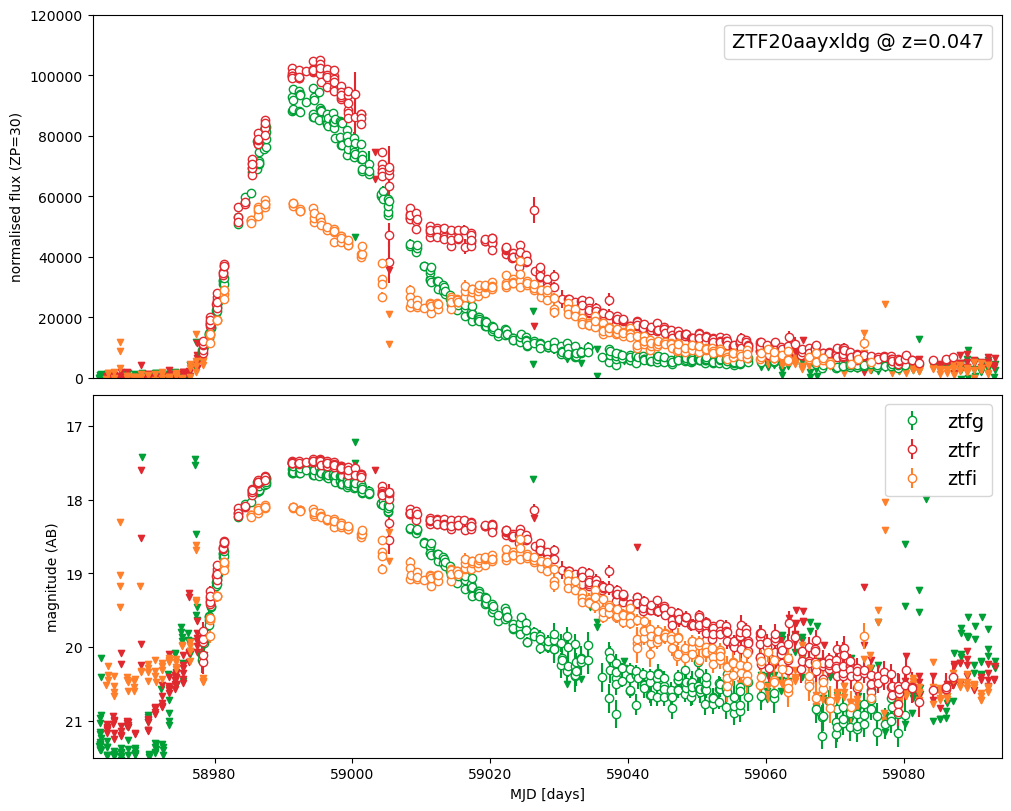

In [7]:
lc                    = ztfcosmo.get_target_lightcurve(ztfname)
lc['zpsys']           = 'ab'
lc                    = lc[['mjd', 'filter', 'flux', 'flux_err', 'ZP', 'zpsys','mag','mag_err']]
# Define the limiting magnitude for an observation
lc['mag_lim']         = lc.apply(lambda row: -2.5*np.log10(5*row['flux_err'])+row['ZP'] if \
                                 row['flux']/row['flux_err']<5. else float("NAN"), axis=1)
time_range            = [-30, 100]
lc                    = lc[(lc.mjd>entry.t0+time_range[0]) & (lc.mjd<entry.t0+time_range[1])]
# ----------------------------------------------------------- # 
fig, axs              = plt.subplots(ncols=1, nrows=2, figsize=(10,8), layout="constrained", sharex='col')
# ----------------------------------------------------------- # 
# Flux-space
for n, filt in enumerate(filts):
    lc_band           = lc[(lc['filter']==filt) & (lc['flux']/lc['flux_err']>=5)]
    nd_band           = lc[(lc['filter']==filt) & (lc['flux']/lc['flux_err']<5)]
    if (len(lc_band)>0) | (len(nd_band)>0):
        _             = axs[0].errorbar(lc_band.mjd,lc_band.flux, yerr=lc_band.flux_err, fmt='o', \
                                     c=filt_cols[n], mfc='w', zorder=1, label=filt)
        _             = axs[0].scatter(nd_band.mjd,nd_band.flux, marker='v', c=filt_cols[n], s=20, zorder=1)
# --- #
legend_elements       = [Line2D([0], [0], marker='o', lw=4, color='w', label=f'{ztfname} @ z={entry.redshift:0.3f}')]
legend_info           = axs[0].legend(handles=legend_elements, loc='upper right', fancybox=True, framealpha=0.8, \
                                   handlelength=0, handletextpad=0, prop={'size': 14})
_                     = axs[0].set_ylim(0,np.min([lc.flux.max()*1.1,1.2e5]))
_                     = axs[0].set_xlim(lc.mjd.min()-1, lc.mjd.max()+1)
_                     = axs[0].set_xlabel('MJD [days]')
_                     = axs[0].set_ylabel('normalised flux (ZP=30)')
_                     = axs[0].get_xaxis().set_visible(False)
# ----------------------------------------------------------- #
# Magnitude-space
for n, filt in enumerate(filts):
    lc_band           = lc[(lc['filter']==filt) & (lc['flux']/lc['flux_err']>=5)]
    nd_band           = lc[(lc['filter']==filt) & (lc['flux']/lc['flux_err']<5)]
    if (len(lc_band)>0) | (len(nd_band)>0):
        _             = axs[1].errorbar(lc_band.mjd,lc_band.mag, yerr=lc_band['mag_err'], fmt='o', \
                                        c=filt_cols[n], mfc='w', zorder=1, label=filt)
        _             = axs[1].scatter(nd_band.mjd,nd_band.mag_lim, marker='v', c=filt_cols[n], s=20, zorder=1)
_                     = axs[1].set_ylim(21.5,lc.mag.min()*0.95)
_                     = axs[1].set_xlim(lc.mjd.min()-1, lc.mjd.max()+1)
_                     = axs[1].set_xlabel('MJD [days]')
_                     = axs[1].set_ylabel('magnitude (AB)')
legend_filt           = axs[1].legend(loc='upper right', fancybox=True, framealpha=0.8, prop={'size': 14})


### Our light-curves need an additional uncertainty due to photometric calibration
 * For each data point we increase the uncertainties by including a term corresponding to (2.5%, 3.5%, 6%) of the measured flux

In [8]:
# Apply the error floor
for filt in filts:
    e_floor                   = errfloor[filt]
    valid                     = lc['filter']==filt
    lc.loc[valid, 'flux_err'] = np.sqrt( (lc['flux_err'][valid])**2 + (lc['flux'][valid]*e_floor)**2 )
# Recalculate magnitudes
lc['mag']                     = lc.apply(lambda row: -2.5*np.log10(row['flux'])+row['ZP'] if \
                                         row['flux']/(np.sqrt(row['flux_err']**2+1e-10**2))>=5 else 99.0, axis=1)
lc['mag_err']                 = lc.apply(lambda row: row['mag_err'] if \
                                         row['flux']/(np.sqrt(row['flux_err']**2+1e-10**2))>=5 else 99.0, axis=1)
lc['mag_lim']                 = lc.apply(lambda row: -2.5*np.log10(5*row['flux_err'])+row['ZP'] if \
                                         row['flux']/row['flux_err']<5. else float("NAN"), axis=1)

***
## Light-curve fitting 

### We can use the SALT2 model to determine the best-fit parameters for our object
 * Load the SALT2 model and set some suitable bounds for each parameter
 * Reformat the light-curve to astropy.Table format
 * Using the light-curve and redshift, fit the SALT2 parameters
 * Plot the corresponding model on top of the data
 * Extension: repeat for multiple objects / extend to the SNooPy template

## RESULTS

In [9]:
dust                          = sncosmo.CCM89Dust()
model                         = sncosmo.Model(source='salt2', effects=[dust], effect_names=['mw'], effect_frames=['obs'])
_                             = model.set(z=entry.redshift, mwebv=entry.mwebv, mwr_v=3.1)
bounds                        = ({})
bounds['x0']                  = [1e-5,0.5]
bounds['t0']                  = [entry.t0-5, entry.t0+5]

In [10]:
range                         = [-20, 40]
lc_fit                        = lc[(lc.mjd>entry.t0+range[0]) & (lc.mjd<entry.t0+range[1])]
data                          = Table()
data['time']                  = lc_fit['mjd']
data['band']                  = lc_fit['filter']
data['flux']                  = lc_fit['flux']
data['fluxerr']               = lc_fit['flux_err']
data['zp']                    = lc_fit['ZP']
data['zpsys']                 = lc_fit['zpsys']

In [11]:
result, fitted_model          = sncosmo.fit_lc(data, model, vparam_names=['t0','x0','x1','c'], \
                                               guess_amplitude=True, guess_t0=False, bounds=bounds, \
                                               modelcov=True)
params                        = {name:value for name, value in zip(result.param_names, result.parameters)}
for name in result.param_names:
    if name in result.errors.keys():
        params[name+'_err']   = result.errors[name]
    else:
        params[name+'_err']   = 0.0
result                        = pd.Series(params)
result

/Users/matt/anaconda3/lib/python3.11/site-packages/iminuit/util.py:175: IMinuitWarning: Assigned errors must be positive. Non-positive values are replaced by a heuristic.
  warnings.warn(


z                0.047193
t0           58993.516557
x0               0.001475
x1               0.730203
c                0.154968
mwebv            0.020400
mwr_v            3.100000
z_err            0.000000
t0_err           0.025633
x0_err           0.000040
x1_err           0.028401
c_err            0.023574
mwebv_err        0.000000
mwr_v_err        0.000000
dtype: float64

/Users/matt/anaconda3/lib/python3.11/site-packages/sncosmo/models.py:189: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


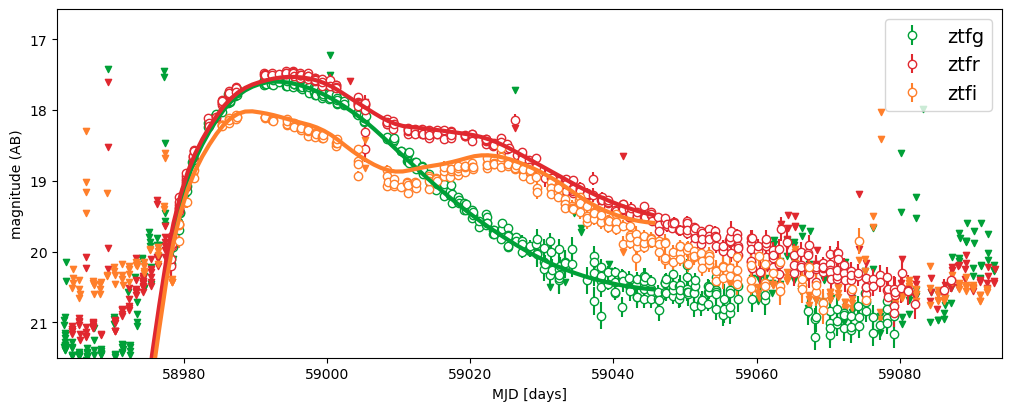

In [12]:
fig, axs              = plt.subplots(ncols=1, nrows=1, figsize=(10,4), layout="constrained")
for n, filt in enumerate(filts):
    lc_band           = lc[(lc['filter']==filt) & (lc['flux']/lc['flux_err']>=5)]
    nd_band           = lc[(lc['filter']==filt) & (lc['flux']/lc['flux_err']<5)]
    if (len(lc_band)>0) | (len(nd_band)>0):
        _             = axs.errorbar(lc_band.mjd,lc_band.mag, yerr=lc_band['mag_err'], fmt='o', \
                                        c=filt_cols[n], mfc='w', zorder=1, label=filt)
        _             = axs.scatter(nd_band.mjd,nd_band.mag_lim, marker='v', c=filt_cols[n], s=20, zorder=1)
    dummy_time        = np.arange(fitted_model.mintime(), fitted_model.maxtime(),1).tolist()
    model_mag         = fitted_model.bandmag([filt], 'ab', dummy_time)
    _                 = axs.plot(dummy_time, model_mag, c=filt_cols[n], zorder=3, lw=3)
_                     = axs.set_ylim(21.5,lc.mag.min()*0.95)
_                     = axs.set_xlim(lc.mjd.min()-1, lc.mjd.max()+1)
_                     = axs.set_xlabel('MJD [days]')
_                     = axs.set_ylabel('magnitude (AB)')
legend_filt           = axs.legend(loc='upper right', fancybox=True, framealpha=0.8, prop={'size': 14})


***

## Distance determination : photometric correlations
 * For standard candles, then their distance could be derived from $\mu = m_B - M_{abs}$
     * where $m_B = -2.5\times\log_{10}(x_0) + 10.653$
     * and $\mu = 5\times\log_{10}\left(\frac{D_L}{10pc}\right) + 25$
***
 * SNeIa are standardisable candles, so the above is modified to:
     * $\mu = m_B - M_{abs} + \alpha\times x_1 - \beta\times c + \gamma(\text{mass})$
     * where $(x1,c)$ were derived from our SALT2 fitting, ($\alpha,\beta$) are constants, and $\gamma$ is a step-wise function

     * $\gamma(\text{globalmass}) = \left\{ 
  \begin{array}{ c l }
    -\gamma/2 & \quad \textrm{if } \text{globalmass} \geq 10 \\
    \gamma/2  & \quad \textrm{otherwise}
  \end{array}
\right.$

### Consider the unbiased, well-measured proportion of our dataset, by applying the following cuts:
 * `lccoverage_flag==1` | `fitquality_flag==1` | `fitprob>1e-7`
 *  `redshift>0.015` | `redshift<0.06`
 *  `mass!=np.NaN`

In [13]:
best_sample    = sample[(sample.lccoverage_flag==1) & (sample.fitquality_flag==1) & (sample.fitprob>1e-7)]
vol_lim        = best_sample[(best_sample.redshift>0.015) & (best_sample.redshift<0.06)]
vol_lim        = vol_lim[~vol_lim.globalmass.isna()]
print(f'{len(vol_lim)} SNeIa comprise our sample')

966 SNeIa comprise our sample


In [14]:
vol_lim.head(3)

,redshift,redshift_err,source,t0,x0,x1,c,t0_err,x0_err,x1_err,...,dec_host,globalmass,globalmass_err,globalrestframe_gz,globalrestframe_gz_err,d_dlr,localmass,localmass_err,localrestframe_gz,localrestframe_gz_err
ztfname,,,,,,,,,,,,,,,,,,,,,
ZTF18aabyhlc,0.029055,0.000015,z_gal,58180.621262,0.001247,-2.747574,0.333068,0.504143,0.000122,0.091428,...,38.420393,10.003,0.120930,1.169697,0.019849,1.532268,7.405,0.263,0.732697,0.375373
ZTF18aagrtxs,0.029741,0.000011,z_gal,58213.150268,0.005583,-0.711100,-0.148609,0.041382,0.000170,0.037110,...,50.979166,10.583,0.154674,1.268697,0.018439,0.391638,9.062,0.057,1.272697,0.021260
ZTF18aagstdc,0.040367,0.003890,z_snid,58214.478445,0.004135,-0.047931,-0.097615,0.035815,0.000125,0.049832,...,42.088448,7.942,0.153154,1.082697,0.162111,0.146010,7.874,0.481,1.249697,1.128405


Define $m_B$ and $M_{abs}$

In [15]:
vol_lim.loc[:,'mB']      = -2.5*np.log10(vol_lim.x0) + 10.653
vol_lim.loc[:,'mB_err']  = fac*vol_lim.x0_err/vol_lim.x0
vol_lim.loc[:, 'M_abs']  = vol_lim.mB - Planck18.distmod(vol_lim.redshift).value

### Determine ($\alpha$,$\beta$,$\gamma$) for our sample and measure distances
 * Write two functions; one defining a linear relationship, the other defining a step-wise function
 * Using the `curve_fit` function, determine the relationship between $M_{abs}$ and $c$ (aka $\beta$)
 * Subtracting this correlation, determine the relationship between $M_{abs}$ and $x_1$ (aka $\alpha$)
 * Subtracting this correlation, determine the relationship between $M_{abs}$ and $globalmass$ (aka $\gamma$)
 * Visualise the results in three plots
***
 * Use this information to determine the distance ($\mu$) to each event
 * Plot a Hubble diagram, and the residuals for the ZTF-DR2 sample
***
 * Extension: using the goodness of fit, determine the intrinsic dispersion ($\sigma_{int}$) required
 * Extension: Is the distribution of $x_1$ gaussian? Is there a dependence on galaxy properties?
 * Extension: repeat the above, only using a simultaneous fitting (MCMC) approach
 * Extension: consider other tracers ($localrestframe_gz$)

## RESULTS

In [16]:
def linear_func(x, A=0, B=0):
    """Linear function (y = A*x + B)"""
    return A*x + B
def step_func(x, gamma=0.1, norm = -19, split=10):
    """Step function (y = gamma/2 if x>split; else y = -gamma/2)"""
    y = np.zeros(len(x))
    y[x<split]  = gamma/2
    y[x>=split] = -gamma/2
    y           = y + norm
    return y
def chi2(data, model, err):
    """Function to calculate the chi2"""
    return np.sum((data - model)**2/err**2)/len(data)

In [17]:
dummy_x1           = np.linspace(-3.5, 3, 50)
dummy_c            = np.linspace(-0.3, 1.0, 50)
dummy_mass         = np.linspace(6, 12, 50)

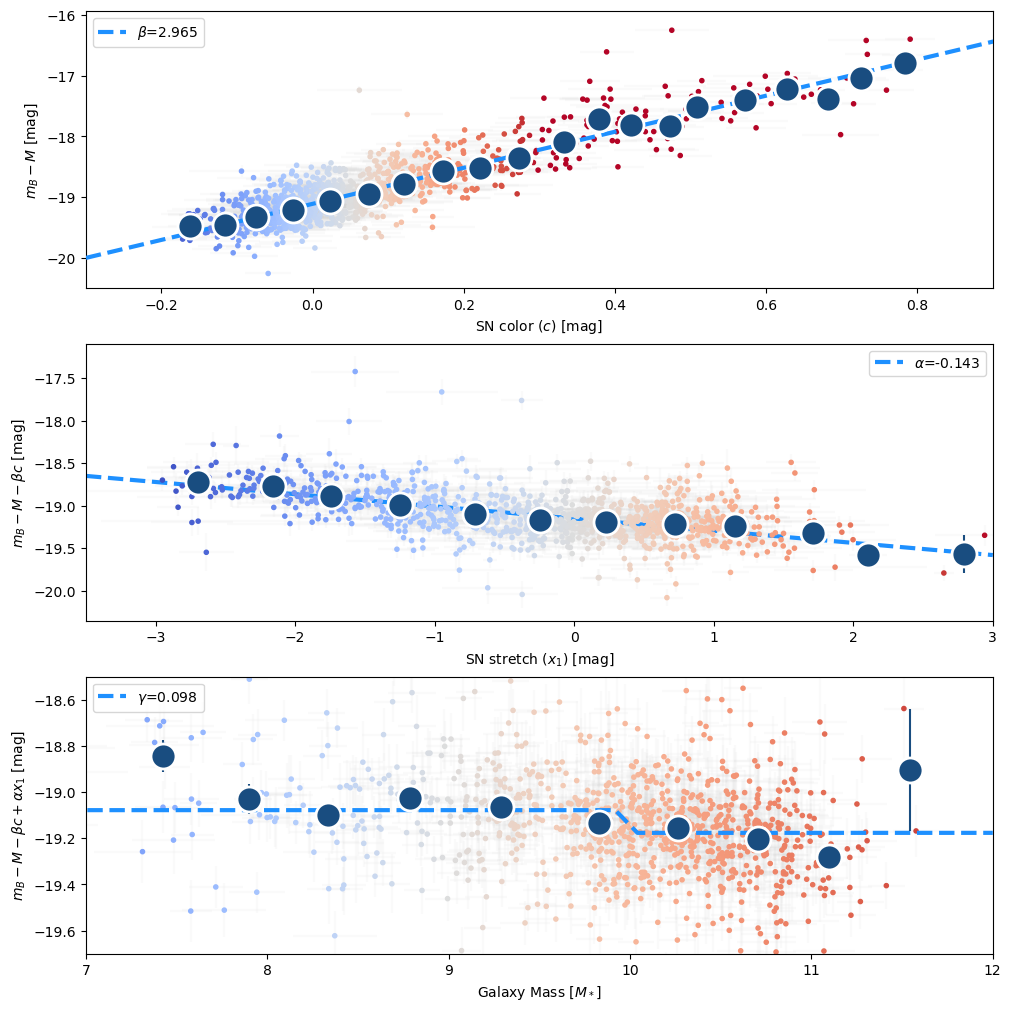

In [18]:
# --- #
fig, axs           = plt.subplots(ncols=1, nrows=3, figsize=(10,10), layout="constrained")
# ----------------------------------------------------------- #
# Correlate color and mB-M
_                  = axs[0].scatter(vol_lim.c, vol_lim.M_abs, marker='.', c=vol_lim.c, vmax=0.3, vmin=-0.2, cmap="coolwarm", zorder=5)
_                  = axs[0].errorbar(vol_lim.c, vol_lim.M_abs, xerr=vol_lim.c_err, yerr=vol_lim.mB_err, fmt='.', \
                                    mfc='white', ms=0, ecolor='lightgrey', alpha=0.1, zorder=1)
c_opt, c_cov       = opt.curve_fit(linear_func, vol_lim.c, vol_lim.M_abs, sigma=vol_lim.c_err, absolute_sigma=True)
_                  = axs[0].plot(dummy_c, linear_func(dummy_c, *c_opt), zorder=10, lw=3, color='dodgerblue', \
                                 label=r'$\beta$'+f'={c_opt[0]:0.3f}', ls='--')
# Binning in x
bins               = np.linspace(-0.3,0.8,int((0.8--0.3)/0.05)+1)
groups             = vol_lim.groupby([pd.cut(vol_lim.c, bins)], observed=True)
bin_x, bin_y, bin_c = groups.c.median(), groups.M_abs.median(), groups.M_abs.count()
bin_err            = groups.M_abs.std()/np.sqrt(bin_c)
_                  = axs[0].errorbar(bin_x, bin_y, yerr=bin_err, fmt='o', c=colors['blue'], \
                                     markeredgecolor='white', markeredgewidth=2, ms=18, zorder=10)
_                  = axs[0].set_xlabel('SN color ($c$) [mag]')
_                  = axs[0].set_ylabel('$m_B - M$ [mag]')
_                  = axs[0].legend()
_                  = axs[0].set_xlim([-0.3,0.9])
# ----------------------------------------------------------- #
# Correct m - M for color
vol_lim['M_abs_c_corr']  = vol_lim.M_abs - c_opt[0]*vol_lim.c
vol_lim['M_err_c_corr']  = np.sqrt(vol_lim.mB_err**2 + (c_opt[0]*vol_lim.c_err)**2)
# --- #
_                  = axs[1].scatter(vol_lim.x1, vol_lim.M_abs_c_corr, marker='.', c=vol_lim.x1, vmax=3., vmin=-3, cmap="coolwarm", zorder=5)
_                  = axs[1].errorbar(vol_lim.x1, vol_lim.M_abs_c_corr, xerr=vol_lim.x1_err, yerr=vol_lim.M_err_c_corr, fmt='.', \
                                    mfc='white', ms=0, ecolor='lightgrey', alpha=0.1, zorder=1)
x1_opt, x1_cov     = opt.curve_fit(linear_func, vol_lim.x1, vol_lim.M_abs_c_corr, sigma=vol_lim.x1_err, absolute_sigma=True)
_                  = axs[1].plot(dummy_x1, linear_func(dummy_x1, *x1_opt), lw=3, color='dodgerblue', \
                                 label=r'$\alpha$'+f'={x1_opt[0]:0.3f}', ls='--')
# Binning in x
bins               = np.linspace(-3.5,3,int((3.--3.5)/0.5)+1)
groups             = vol_lim.groupby([pd.cut(vol_lim.x1, bins)], observed=True)
bin_x, bin_y, bin_c = groups.x1.median(), groups.M_abs_c_corr.median(), groups.M_abs_c_corr.count()
bin_err            = groups.M_abs_c_corr.std()/np.sqrt(bin_c)
_                  = axs[1].errorbar(bin_x, bin_y, yerr=bin_err, fmt='o', c=colors['blue'], markeredgecolor='white', \
                                     markeredgewidth=2, ms=18, zorder=10)
_                  = axs[1].set_xlabel('SN stretch ($x_1$) [mag]')
_                  = axs[1].set_ylabel(r'$m_B - M - \beta c$ [mag]')
_                  = axs[1].legend()
_                  = axs[1].set_xlim([-3.5, 3])
# ----------------------------------------------------------- #
# Correct m - M - beta*c for x1
vol_lim['M_abs_corr']  = vol_lim.M_abs_c_corr - x1_opt[0]*vol_lim.x1
vol_lim['M_err_corr']  = np.sqrt(vol_lim.M_err_c_corr**2 + (x1_opt[0]*vol_lim.x1_err)**2)
# --- #
_                  = axs[2].scatter(vol_lim.globalmass, vol_lim.M_abs_corr, marker='.', c=vol_lim.globalmass, \
                                    vmax=12, vmin=6, cmap="coolwarm", zorder=2)
_                  = axs[2].errorbar(vol_lim.globalmass, vol_lim.M_abs_corr, xerr=vol_lim.globalmass_err, yerr=vol_lim.M_err_corr, fmt='.', \
                                    mfc='white', ms=0, ecolor='lightgrey', alpha=0.1, zorder=1)
mass_opt, mass_cov = opt.curve_fit(step_func, vol_lim.globalmass, vol_lim.M_abs_corr, sigma=vol_lim.globalmass_err, \
                                   p0=[0.06, 0.0, 10.], absolute_sigma=True)
_                  = axs[2].plot(dummy_mass, step_func(dummy_mass, *mass_opt), lw=3, color='dodgerblue', \
                                 label=r'$\gamma$'+f'={mass_opt[0]:0.3f}', ls='--', zorder=5)
# Binning in x
bins               = np.linspace(6,12,int((12.-6.)/0.5)+1)
groups             = vol_lim.groupby([pd.cut(vol_lim.globalmass, bins)], observed=True)
bin_x, bin_y, bin_c  = groups.globalmass.median(), groups.M_abs_corr.median(), groups.M_abs_corr.count()
bin_err            = groups.M_abs_corr.std()/np.sqrt(bin_c)
_                  = axs[2].errorbar(bin_x, bin_y, yerr=bin_err, fmt='o', c=colors['blue'], \
                                     markeredgecolor='white', markeredgewidth=2, ms=18, zorder=10)
_                  = axs[2].set_xlabel('Galaxy Mass [$M_*$]')
_                  = axs[2].set_ylabel(r'$m_B - M - \beta c + \alpha x_1$ [mag]')
_                  = axs[2].legend()
_                  = axs[2].set_xlim([7, 12])
_                  = axs[2].set_ylim([-19.7, -18.5])
# ----------------------------------------------------------- #
# Correct m - M - beta*c + alpha*x1 for gamma
vol_lim['distances']     = vol_lim.mB - c_opt[0]*vol_lim.c + x1_opt[0]*vol_lim.x1 - step_func(vol_lim.globalmass, *mass_opt)
vol_lim['distance_err']  = np.sqrt(vol_lim.M_err_corr**2 + mass_opt[0]**2)
vol_lim['residuals']     = vol_lim.M_abs_corr - step_func(vol_lim.globalmass, *mass_opt)

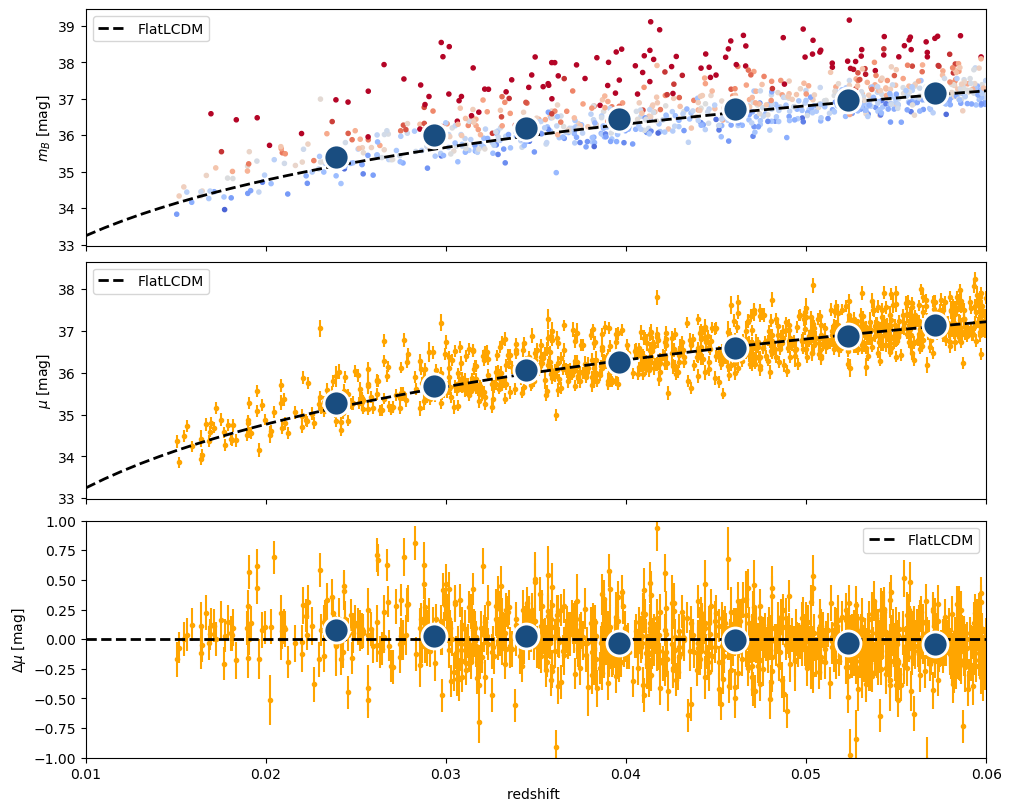

In [19]:
dummy_z            = np.linspace(0.01, 0.06, 50)
fig, axs           = plt.subplots(ncols=1, nrows=3, figsize=(10,8), layout="constrained", sharex='col')
# ----------------------------------------------------------- #
_                  = axs[0].scatter(vol_lim.redshift, vol_lim.mB+19.15, marker='.', ls='', c=vol_lim.c, vmax=0.3, \
                                    vmin=-0.2, cmap="coolwarm")
_                  = axs[0].plot(dummy_z, Planck18.distmod(dummy_z).value, color='black', zorder=10, lw=2, ls='--', label='FlatLCDM')
#_                  = axs[0].set_xlabel('redshift ')
# Binning in x
bins               = np.linspace(0.02, 0.06,int((0.06-0.02)/0.005)+1)
groups             = vol_lim.groupby([pd.cut(vol_lim.redshift, bins)], observed=True)
bin_x, bin_y, bin_c = groups.redshift.median(), groups.mB.median()+19.15, groups.mB.count()
bin_err            = groups.mB.std()/np.sqrt(bin_c)
_                  = axs[0].errorbar(bin_x, bin_y, yerr=bin_err, fmt='o', c=colors['blue'], markeredgecolor='white', \
                                     markeredgewidth=2, ms=18, zorder=10)
_                  = axs[0].set_ylabel(r'$m_B$ [mag]')
_                  = axs[0].legend()
_                  = axs[0].set_xlim([0.01,0.06])
# ----------------------------------------------------------- #
_                  = axs[1].errorbar(vol_lim.redshift, vol_lim.distances, vol_lim.distance_err, marker='.', ls='', color='orange')
_                  = axs[1].plot(dummy_z, Planck18.distmod(dummy_z).value, color='black', zorder=10, lw=2, ls='--', label='FlatLCDM')
#_                  = axs[1].set_xlabel('redshift ')
# Binning in x
bins               = np.linspace(0.02, 0.06,int((0.06-0.02)/0.005)+1)
groups             = vol_lim.groupby([pd.cut(vol_lim.redshift, bins)], observed=True)
bin_x, bin_y, bin_c = groups.redshift.median(), groups.distances.median(), groups.distances.count()
bin_err            = groups.distances.std()/np.sqrt(bin_c)
_                  = axs[1].errorbar(bin_x, bin_y, yerr=bin_err, fmt='o', c=colors['blue'], markeredgecolor='white', \
                                     markeredgewidth=2, ms=18, zorder=10)
_                  = axs[1].set_ylabel(r'$\mu$ [mag]')
_                  = axs[1].legend()
_                  = axs[1].set_xlim([0.01,0.06])
# ----------------------------------------------------------- #
_                  = axs[2].errorbar(vol_lim.redshift, vol_lim.residuals, vol_lim.distance_err, marker='.', ls='', color='orange')
_                  = axs[2].plot(dummy_z, dummy_z*0, color='black', zorder=10, lw=2, ls='--', label='FlatLCDM')
# Binning in x
bins               = np.linspace(0.02, 0.06,int((0.06-0.02)/0.005)+1)
groups             = vol_lim.groupby([pd.cut(vol_lim.redshift, bins)], observed=True)
bin_x, bin_y, bin_c = groups.redshift.median(), groups.residuals.median(), groups.residuals.count()
bin_err            = groups.residuals.std()/np.sqrt(bin_c)
_                  = axs[2].errorbar(bin_x, bin_y, yerr=bin_err, fmt='o', c=colors['blue'], markeredgecolor='white', \
                                     markeredgewidth=2, ms=18, zorder=10)
_                  = axs[2].set_xlabel('redshift ')
_                  = axs[2].set_ylabel(r'$\Delta\mu$ [mag]')
_                  = axs[2].legend()
_                  = axs[2].set_xlim([0.01,0.06])
_                  = axs[2].set_ylim([-1.0,1.0])

In [20]:
### Sigma_int 
sigma_int = 0.175
chi2(vol_lim.residuals, vol_lim.residuals*0, np.sqrt(vol_lim.distance_err**2 + sigma_int**2))

0.9994322805468879

### Done
***